In [1]:
import pathlib,sys, pandas as pd
parent_path=str(pathlib.Path().absolute().parent)
if parent_path not in sys.path: sys.path.append(parent_path)
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from affinity.clustering import clusterGenerators, plotMap

In [21]:
file_path='../data/data_20200716_035506.csv' # La ruta de los archivos de señales
file_units_gps='../data/units_gps.csv' # La ruta del archivo con las coordenadas de casa generador
data=pd.read_csv(file_path, sep=',', skiprows=[0], header=None)
units=pd.read_csv(file_units_gps)

In [4]:
# Para este archivo quito las dos primeras linead del csv de señales
data

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,637304685060000000,60.0079,60.0093,60.0077,60.0099,60.0105,60.0092,60.0083,60.0083,60.0083,...,60.0098,60.0089,60.0093,60.0095,60.0089,60.0096,60.0092,0,0,0
1,637304685061000000,60.0074,60.0097,60.0101,60.0109,60.0096,60.0093,60.0094,60.0092,60.0092,...,60.0089,60.0092,60.0095,60.0094,60.0084,60.0090,60.0093,0,0,0
2,637304685062000000,60.0066,60.0108,60.0098,60.0103,60.0100,60.0087,60.0094,60.0093,60.0089,...,60.0096,60.0094,60.0089,60.0080,60.0090,60.0096,60.0095,0,0,0
3,637304685063000000,60.0094,60.0105,60.0086,60.0108,60.0093,60.0094,60.0098,60.0089,60.0087,...,60.0099,60.0095,60.0091,60.0102,60.0099,60.0097,60.0094,0,0,0
4,637304685064000000,60.0095,60.0108,60.0095,60.0115,60.0084,60.0099,60.0096,60.0089,60.0085,...,60.0103,60.0091,60.0090,60.0104,60.0091,60.0097,60.0096,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,637304685656000000,59.9758,59.9753,59.9759,59.9740,59.9757,59.9763,59.9783,59.9757,59.9752,...,59.9724,59.9771,59.9771,59.9756,59.9768,59.9758,59.9756,0,0,0
597,637304685657000000,59.9764,59.9752,59.9734,59.9744,59.9751,59.9756,59.9768,59.9756,59.9755,...,59.9735,59.9767,59.9763,59.9759,59.9765,59.9754,59.9757,0,0,0
598,637304685658000000,59.9775,59.9748,59.9774,59.9747,59.9755,59.9758,59.9781,59.9761,59.9760,...,59.9743,59.9760,59.9754,59.9755,59.9767,59.9752,59.9757,0,0,0
599,637304685659000000,59.9763,59.9752,59.9767,59.9762,59.9758,59.9754,59.9779,59.9763,59.9764,...,59.9742,59.9760,59.9753,59.9755,59.9764,59.9753,59.9756,0,0,0


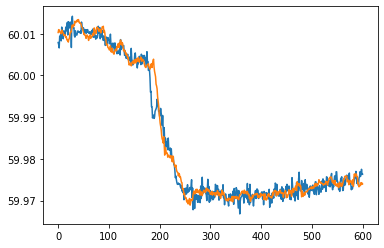

In [20]:
plt.plot(data.loc[:,1])
plt.plot(data.loc[:,11])

In [5]:
units.head()

,FDRid,Longitude,Latitude
0,601,-77.4,37.5
1,620,-87.9,41.6
2,621,-83.1,42.4
3,623,-82.4,27.9
4,634,-88.5,42.6


In [24]:
# Para que esto funcione el archivo de señales debe estar en el mismo formato que
# el archivo ../data/data_20200716_035506.csv y el de cordenadas gps en el mismo
# que ../data/units_gps.csv

mapa,tabla=plotMap(file_path,file_units_gps) # regresa el mapa y la tabla 

**Es muy importate que definamos un formato para los datos de entrada, por usalmente no son muy heterogéneos**

In [27]:
mapa.show()

In [8]:
tabla # la tabla

,Area id,Sources (buses),Centroid
0,1,3001,3001
1,2,"647,749,787,969,980,1370,1374,1407,1416,1445,1608",1608
2,3,"620,640,686,755,778,797,1066,1368,1398,1401,14...",1368
3,4,"682,684,859,881,960,1030,1126,1434",682
4,5,1391,1391
5,6,"634,714,726,734,777,781,790,874,877,886,915,96...",1399
6,7,"673,762,767,873,891,931,936,984,1013,1069,1071...",984
7,8,"623,742,899,973,1000,1413,1418,1427,1475",1427
8,9,"601,774,792,847,945,964,998,1009,1055,1132,140...",1431
9,10,"826,843,892,953,985,1364,1406,1436",826


In [28]:
tabla.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Area id</th>\n      <th>Sources (buses)</th>\n      <th>Centroid</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>3001</td>\n      <td>3001</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>647,749,787,969,980,1370,1374,1407,1416,1445,1608</td>\n      <td>1608</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>620,640,686,755,778,797,1066,1368,1398,1401,1410,1443,1444,1497</td>\n      <td>1368</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>4</td>\n      <td>682,684,859,881,960,1030,1126,1434</td>\n      <td>682</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>5</td>\n      <td>1391</td>\n      <td>1391</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>6</td>\n      <td>634,714,726,734,777,781,790,874,877,886,915,961,976,1059,1373,1375,1399,1430,1458,1459</td>\n    